# LetsGrowMore - Beginner Level Task - 3

### Music Recommendation

#### Description

Music recommender systems can suggest songs to users based on their listening patterns.

Dataset Link Provided - https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

### 1) Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### 2) Importing And Reading The Datasets

In [2]:
train_dataset = pd.read_csv("train.csv", nrows = 7000)
train_dataset

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
6995,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,kU2L9oE7z8H2bB+2/h0ZuRjvJ5t0QheJyggAB1fV6ac=,search,Online playlist more,online-playlist,0
6996,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,M5jomDIbTepOkTFwYQ8CSAPObDTzPT93Uhc6+OMjtPk=,my library,Local playlist more,local-library,1
6997,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,w47lM8vYQxHnTEdTUxbCF3+qJlOZy2T+WBPAGaaEmT8=,my library,Local playlist more,local-library,1
6998,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,oU2T/lj1BsqWxNgh+xkmiBaPNYzNAoQj4zI1/mnjjiw=,search,Online playlist more,online-playlist,0


In [3]:
names = ['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test_dataset = pd.read_csv("train.csv", names = names, skiprows = 7000, nrows = 3000)
test_dataset

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,1
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,1
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,0
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,0
...,...,...,...,...,...,...
2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library,1
2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,NaN,top-hits-for-artist,1
2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,NaN,top-hits-for-artist,1
2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist,1


In [4]:
songs_dataset = pd.read_csv("songs.csv")
songs_dataset

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


In [5]:
members_dataset = pd.read_csv("members.csv")
members_dataset

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


### 3) Exploratory Analysis Of The Datasets

#### i) Train Dataset

In [6]:
type(train_dataset)

pandas.core.frame.DataFrame

In [7]:
train_dataset.shape

(7000, 6)

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [9]:
train_dataset.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [10]:
train_dataset.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [11]:
train_dataset.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
6995,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,kU2L9oE7z8H2bB+2/h0ZuRjvJ5t0QheJyggAB1fV6ac=,search,Online playlist more,online-playlist,0
6996,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,M5jomDIbTepOkTFwYQ8CSAPObDTzPT93Uhc6+OMjtPk=,my library,Local playlist more,local-library,1
6997,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,w47lM8vYQxHnTEdTUxbCF3+qJlOZy2T+WBPAGaaEmT8=,my library,Local playlist more,local-library,1
6998,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,oU2T/lj1BsqWxNgh+xkmiBaPNYzNAoQj4zI1/mnjjiw=,search,Online playlist more,online-playlist,0
6999,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1


In [12]:
train_dataset.sample(5)
#displays few random rows from the dataset

,msno,song_id,source_system_tab,source_screen_name,source_type,target
5205,a1d2KnoIq+/QdPaHUojFU7jnze1HDUxu5VFHJ2hti2w=,bPnTMunO9jVSYu0fb4MWmypEpkGZ+obcYuBwYI3+cB4=,my library,Local playlist more,local-playlist,1
6198,1WRv3lXnfXjvSKPXJD8zB//iTTIuKAiWQLjM3vy2+gc=,nW60n6qAGoytY/yX4w0r1IT462C9Xs/ZxbV6MLDSpUk=,discover,Online playlist more,online-playlist,1
5756,xKQhckxYfI5AMFSdzbP99SkbbKp5ZHmD00Yxz5Nfkbs=,2y7YQQgcX9VrGWiNM2JlVtb66uzp1+b+pcGeAHitjss=,discover,NaN,song-based-playlist,1
4164,bHaK+LAC5xpszdTYiNLCHZ1g940Gs8r9Hmfke/X4aWI=,ZR8NR3x8/NWKIL6rZ4z/55yHN0x2CkfMCwDZadRuDVk=,my library,Local playlist more,local-library,1
705,kh79ZF0a1CQSXch8gOazC5EbKxsbGg2o7wOabckp5X0=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,my library,Local playlist more,local-library,1


In [13]:
train_dataset.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [14]:
train_dataset['source_type'].value_counts()
#Searches a particular column to identify the different categories in it as well as finds the count of values per category.

local-library          3422
local-playlist         1678
online-playlist         996
top-hits-for-artist     232
album                   176
radio                   153
song-based-playlist     150
listen-with              95
song                     72
artist                   12
Name: source_type, dtype: int64

In [15]:
train_dataset['source_type'].nunique()
#Displays unique values count in a particular column

10

#### ii) Songs Dataset

In [16]:
type(songs_dataset)

pandas.core.frame.DataFrame

In [17]:
songs_dataset.shape

(2296320, 7)

In [18]:
songs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [19]:
songs_dataset.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [20]:
songs_dataset.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [21]:
songs_dataset.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [22]:
songs_dataset.sample(5)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1643503,xSj2upoHC1hhMJ4tOIEWKAssWTy4IHuI6YmSQQDlnRc=,578351,2022,Greymachine,NaN,NaN,52.0
1350685,sfeHzqhK2ZeZBeq5F0m2JFiTj2VJmQBb6YvKjDeQ8Y8=,364703,465,The Alan Parsons Project,NaN,NaN,52.0
1853757,Y3vthPM6TrHsknCBZig54Zvsft8bols1CIhPTbMYkFw=,143220,2122,Sammy Davis Jr.,Leslie Bricusse| Anthony Newley,NaN,52.0
1589532,lsjS8uesU4bvJ+Fu1qnIUABv6dTfqFug0MJboB8xSHs=,215353,958,Johann Sebastian Bach,NaN,NaN,-1.0
265777,lp52fT6OTW8pe+ZLWMQWrsQ9AZZZdLUr9BsmyQLKH2w=,224769,958,Vincent Lucas,Johann Sebastian Bach,NaN,-1.0


In [23]:
songs_dataset.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [24]:
songs_dataset['artist_name'].value_counts()

Various Artists                 145916
証聲音樂圖書館 ECHO MUSIC               11276
Billy Vaughn                      4828
รวมศิลปิน                         4432
Richard Clayderman                4180
                                 ...  
Deeperise                            1
Justin Adams & Juldeh Camara         1
Spire Flow                           1
Gil Acevedo                          1
Pirarucu                             1
Name: artist_name, Length: 222363, dtype: int64

In [25]:
songs_dataset['artist_name'].nunique()

222363

#### iii) Members Dataset

In [26]:
type(members_dataset)

pandas.core.frame.DataFrame

In [27]:
members_dataset.shape

(34403, 7)

In [28]:
members_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [29]:
members_dataset.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [30]:
members_dataset.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [31]:
members_dataset.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [32]:
members_dataset.sample(5)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
22063,MSLgKaP+V8MuGvRgHFLF3JB1vytBok5CiMY2emqfbRA=,1,0,NaN,7,20161204,20171003
2132,GdkjJu1gWfMPK5RNMG9LwOvQPlcxYbI9pIwM6WGtRcg=,11,26,female,3,20150202,20170618
26441,0aGQUq3ael8D9JaFKGhPHRqCQqVxeLfHw9dsTnKzERM=,1,0,NaN,7,20161004,20171003
18449,9IqGE2DXqriXnj9uCoSF1tvAyJwNkzoLx3VX9pFlVGw=,1,0,NaN,3,20130208,20171216
13681,BLG25mWiLLlTezOFuhd1xc4JHksG0KEdPbN6gOQv5mw=,15,21,male,3,20150206,20171013


In [33]:
members_dataset.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [34]:
members_dataset['gender'].value_counts()

male      7405
female    7096
Name: gender, dtype: int64

In [35]:
members_dataset['gender'].nunique()

2

### 4) Data Cleaning

#### i) Train Dataset

CHECKING FOR NULL VALUES IN THE DATASET

In [36]:
train_dataset.isnull()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6995,False,False,False,False,False,False
6996,False,False,False,False,False,False
6997,False,False,False,False,False,False
6998,False,False,False,False,False,False


In [37]:
train_dataset.isna().any()

msno                  False
song_id               False
source_system_tab      True
source_screen_name     True
source_type            True
target                False
dtype: bool

In [38]:
train_dataset.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

We can observe that, there are null values present in the dataset in three columns.

In [39]:
train_dataset.fillna(value = 'Not Available', inplace = True)

Now we replaced them, and there are no null values in the dataset.

In [40]:
train_dataset.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

#### ii) Songs Dataset

CHECKING FOR NULL VALUES IN THE DATASET

In [41]:
songs_dataset.isnull()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2296315,False,False,False,False,False,True,False
2296316,False,False,False,False,True,True,False
2296317,False,False,False,False,True,True,False
2296318,False,False,False,False,True,True,False


In [42]:
songs_dataset.isna().any()

song_id        False
song_length    False
genre_ids       True
artist_name    False
composer        True
lyricist        True
language        True
dtype: bool

In [43]:
songs_dataset.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

We can observe that, there are null values present in the dataset in four columns.

In [44]:
songs_dataset['genre_ids'] = songs_dataset['genre_ids'].fillna(0)

In [45]:
songs_dataset['language'] = songs_dataset['language'].fillna(0)

In [46]:
songs_dataset['composer'] = songs_dataset['composer'].fillna('Not Available',)

In [47]:
songs_dataset['lyricist'] = songs_dataset['lyricist'].fillna('Not Available',)

Now we replaced them, and there are no null values in the dataset.

In [48]:
songs_dataset.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

#### iii) Members Dataset

CHECKING FOR NULL VALUES IN THE DATASET

In [49]:
members_dataset.isnull()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
34398,False,False,False,True,False,False,False
34399,False,False,False,False,False,False,False
34400,False,False,False,True,False,False,False
34401,False,False,False,True,False,False,False


In [50]:
members_dataset.isna().any()

msno                      False
city                      False
bd                        False
gender                     True
registered_via            False
registration_init_time    False
expiration_date           False
dtype: bool

In [51]:
members_dataset.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

We can observe that, there are null values present in the dataset in 'Gender' column.

In [52]:
members_dataset.fillna(value = 'Not Available', inplace = True)

Now we replaced them, and there are no null values in the dataset.

In [53]:
members_dataset.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

### 5) Data Visualization

#### TRAIN DATASET

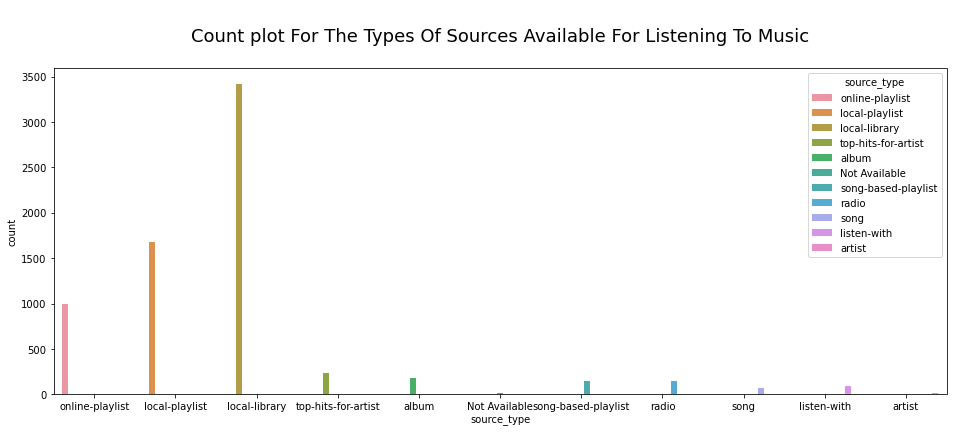

In [54]:
plt.figure(figsize = (16,6))
sb.countplot(x = train_dataset['source_type'], hue = train_dataset['source_type'])
plt.title('\nCount plot For The Types Of Sources Available For Listening To Music\n', fontsize = 18)
plt.show()

#### INFERENCE

From the plot it is evident that, there are local libraries available more in number followed by local playlists and online playlists.

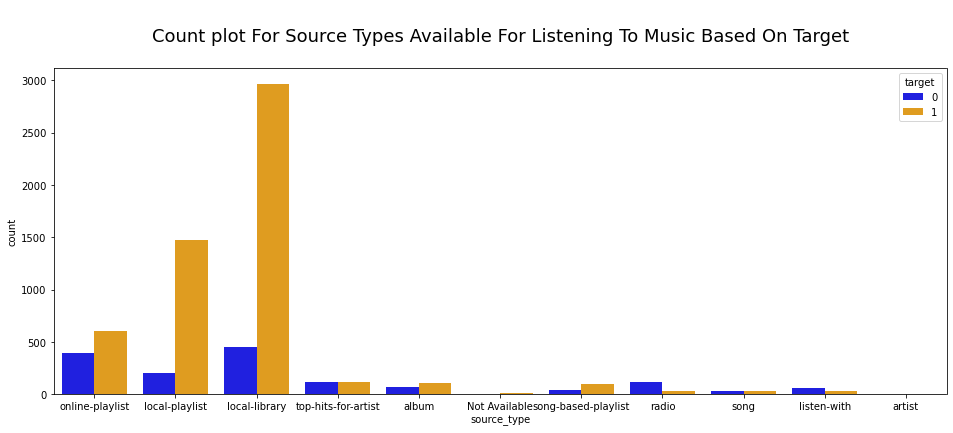

In [55]:
plt.figure(figsize = (16,6))
sb.countplot(x = train_dataset['source_type'], palette = ['blue','orange'], hue = train_dataset['target'])
plt.title('\nCount plot For Source Types Available For Listening To Music Based On Target\n', fontsize = 18)
plt.show()

#### INFERENCE

Based on target, Local libraries are more in number if source type is plotted against count of each category, followed by local playlists and online playlists.

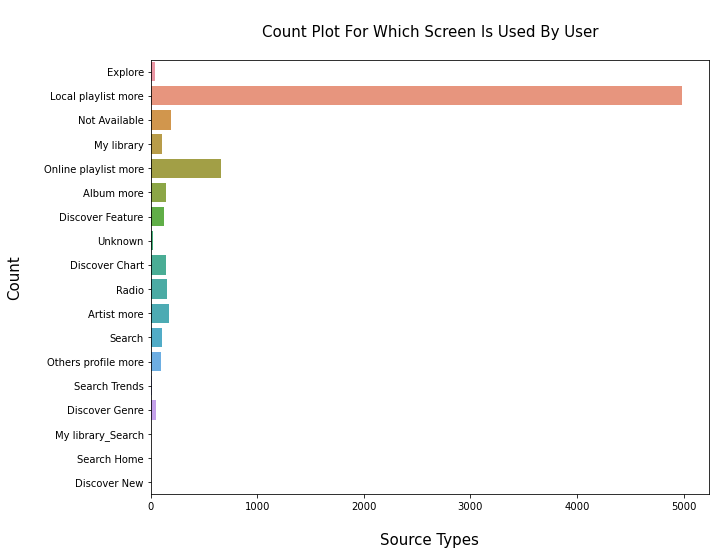

In [56]:
plt.figure(figsize = (10,8))
sb.countplot(y ='source_screen_name', data = train_dataset)
plt.xlabel('\nSource Types', fontsize = 15)
plt.ylabel('Count\n', fontsize = 15)
plt.title('\nCount Plot For Which Screen Is Used By User\n', fontsize = 15)
plt.show()

#### MEMBERS DATASET

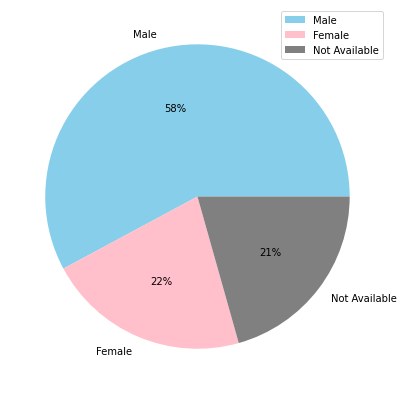

In [57]:
label = ['Male','Female', 'Not Available']
color = ['skyblue','pink', 'grey']
plt.figure(figsize = (7, 7))
data = pd.value_counts(members_dataset.gender)
patches, texts, autotexts = plt.pie(data, labels = label, colors = color, autopct = '%.0f%%')
plt.legend()
plt.show()

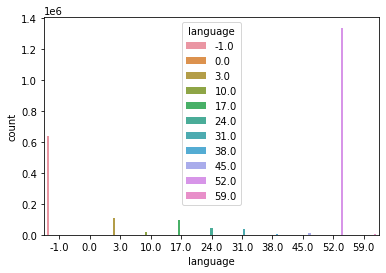

In [58]:
sb.countplot(x = songs_dataset['language'], data = train_dataset, hue = songs_dataset['language'])
plt.show()

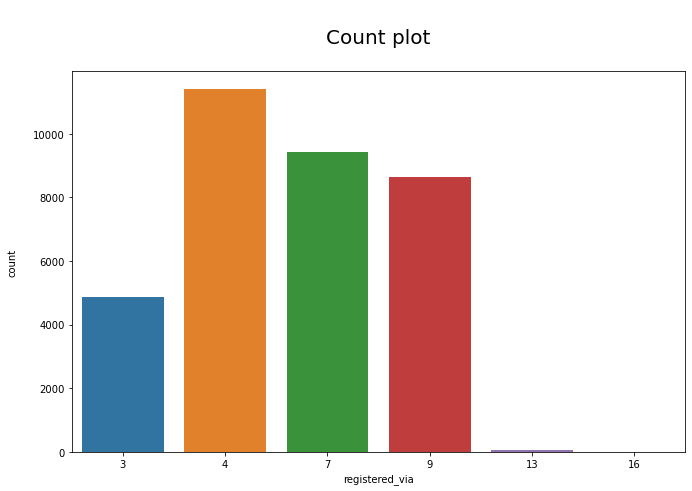

In [59]:
def new_plot(data, x):
  plt.figure(figsize = (11,7))
  sb.countplot(x = x, data = data)
  plt.xlabel(x)
  plt.ylabel('count\n')
  plt.title('\nCount plot\n', fontsize = 20)
new_plot(members_dataset, 'registered_via')

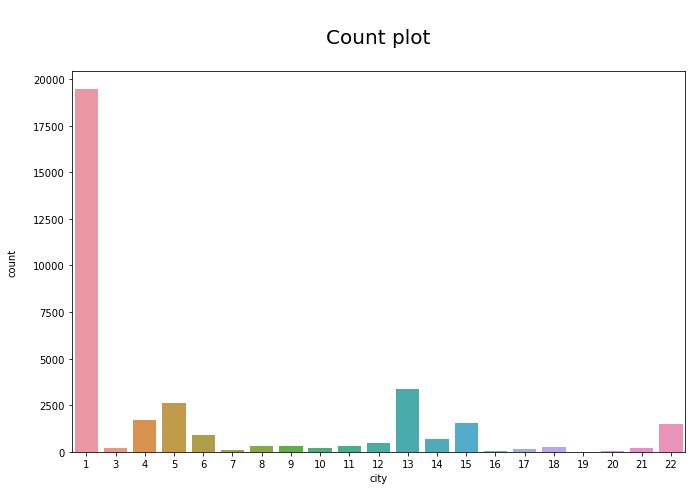

In [60]:
new_plot(members_dataset, 'city')

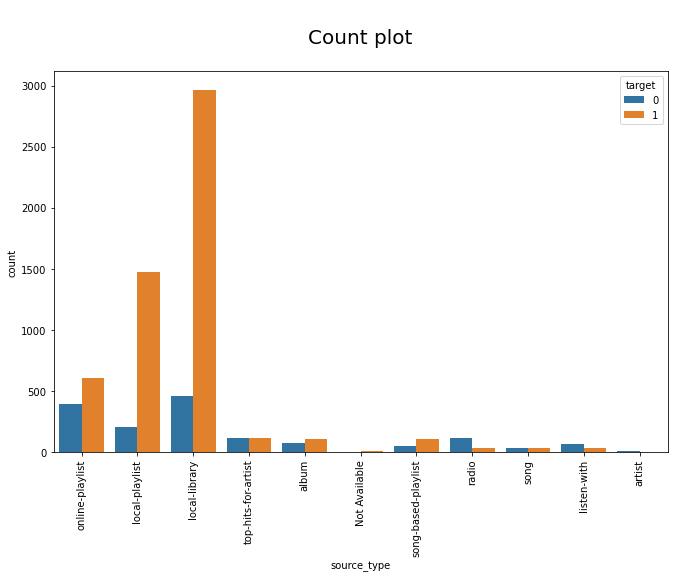

In [61]:
plt.figure(figsize = (11,7))
sb.countplot(x = 'source_type', hue = 'target', data = train_dataset)
plt.title('\nCount plot\n', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


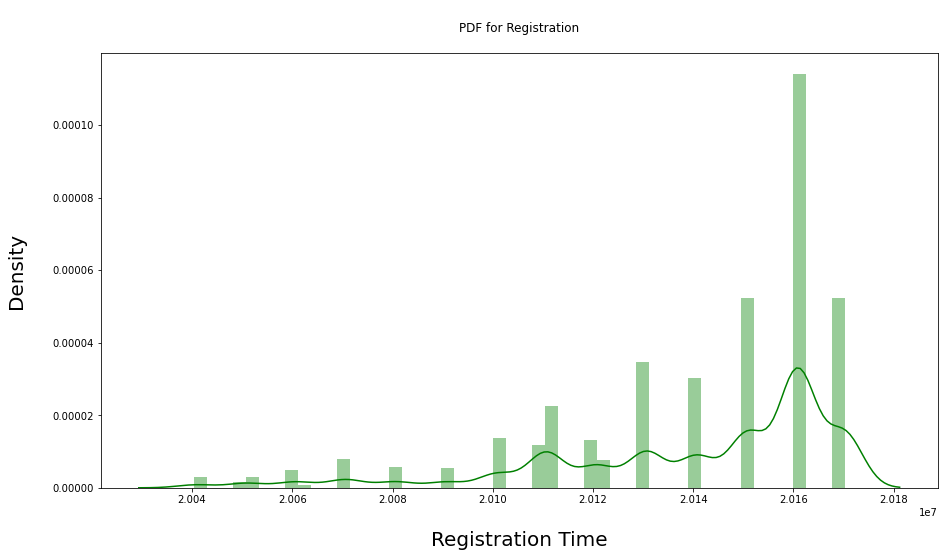

In [62]:
plt.figure(figsize = (15, 8)) 
sb.distplot(members_dataset.registration_init_time, color = 'green')
plt.ylabel('Density\n', fontsize = 20)
plt.xlabel('\nRegistration Time', fontsize = 20)
plt.title('\nPDF for Registration\n')
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


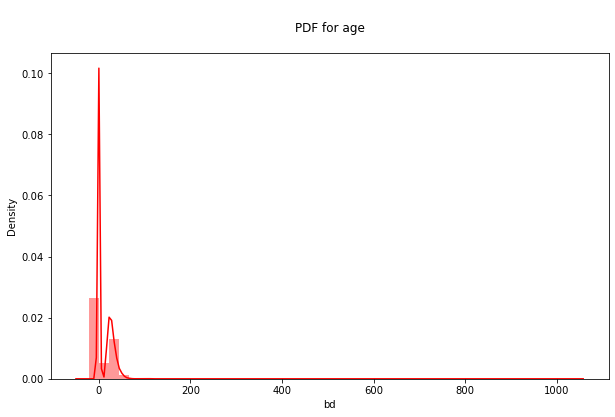

In [63]:
def second_plot(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sb.distplot(x, hist_kws = kwargs, kde_kws = kwargs, color = 'red')
    plt.title('\nCDF for age\n')
  else:
    sb.distplot(x, color='red')
    plt.title('\nPDF for age\n')
second_plot(members_dataset['bd'], False)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


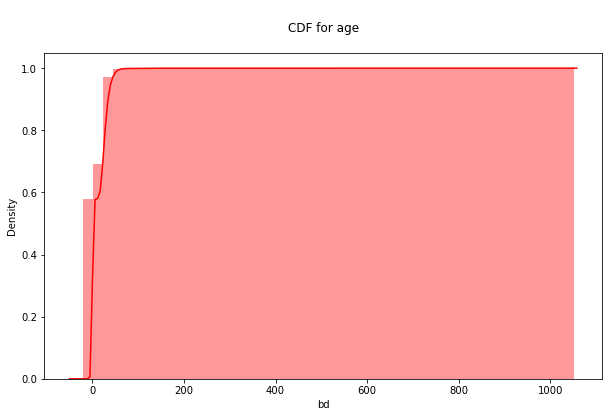

In [64]:
second_plot(members_dataset['bd'], True)
plt.show()

### 6) Data PreProcessing

In [65]:
test = test_dataset.drop(['target'], axis = 1)
ytr = np.array(test_dataset['target'])

In [66]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id'] = np.arange(3000)
test = test[test_name]

In [67]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train_dataset.merge(songs_dataset[song_cols], on ='song_id', how ='left')
test = test.merge(songs_dataset[song_cols], on ='song_id', how ='left')

In [68]:
members_dataset['registration_year'] = members_dataset['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members_dataset['registration_month'] = members_dataset['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members_dataset['registration_date'] = members_dataset['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [69]:
members_dataset['expiration_year'] = members_dataset['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members_dataset['expiration_month'] = members_dataset['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members_dataset['expiration_date'] = members_dataset['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members_dataset.drop(['registration_init_time'], axis = 1)

In [70]:
members_cols = members_dataset.columns
train = train.merge(members_dataset[members_cols], on = 'msno', how = 'left')
test = test.merge(members_dataset[members_cols], on = 'msno', how = 'left')

In [71]:
train = train.fillna(-1)
test = test.fillna(-1)

In [72]:
import gc
del members_dataset, songs_dataset; gc.collect();

In [73]:
colm = list(train.columns)
colm.remove('target')

In [74]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 305.97it/s]


In [75]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

### 7) Building And Training The ML Model

In [76]:
from sklearn.model_selection import train_test_split

import lightgbm as lgb

X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [77]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params,train_set=d_train,num_boost_round=200, valid_sets=watchlist,early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

C:\Users\hp\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\hp\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [78]:
p_test = model1.predict(X_test)

#### FINDING THE ACCURACY OF THE TEST SET

In [79]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('Accuracy on test data:\n {0:f}%'.format(acc))

Accuracy on test data:
 77.700000%


### CONCLUSION

We were able to build a Music Recommender System using the lightgbm ML algorithm successfully.